<font face="Calibri" size="2"> <i>Open SAR Toolkit - Tutorial 4a, version 1.1, Nobember 2019. Andreas Vollrath, ESA/ESRIN phi-lab</i>
</font>

![title](auxiliary/header_image.PNG)

--------

# OST Tutorial IV - A
## How to do a batch processing of Sentinel-1 GRD data subset

--------

**Short description**

This notebook shows f OST for the batch processing of GRD data using the *Sentinel1_GRDBatch* class. This is a subclass of the *Sentinel1* class, and thus inherits all the functionalities of the *Generic* and the *Sentinel1* classes presented in Tutorial II. In addition, functions for the generation of calibrated backscatter products are provided. Within the example a subset area will be produced, thus avoiding the overload of processing the full images.

--------

**Requirements**

- a PC/Mac with at least 16GB of RAM
- about 15GB of free disk space
- a Copernicus Open Data Hub user account, valid for at least 7 days (https://scihub.copernicus.eu)
--------

**NOTE:** all cells that have an * after its number can be executed without changing any code. 

### 1* - Import of Libraries

In this step we import some standard python libraries for OS independent path handling as well as the *Sentinel1_GRDBatch* class thta handles the full workflow from search, download and processing of multiple GRD scenes. In addition, the OST helper module *vector* is loaded to create an AOI based on Point coordinates, and the *raster* module for creating a time-series animation.

In [1]:
import os
from os.path import join
from pprint import pprint

from ost import Sentinel1Batch as Sen1Batch
from ost.helpers import vector, raster

# Setup logging so we can see what could go wrong
import logging
from ost.log import set_log_level
set_log_level(logging.DEBUG)

### 2* - Set up the project 

Here you going to initialize the *Sentinel1_GRDBatch* class by determining the project folder, the AOI and the start and end date. Since you should be already familiar with the *search* and *refine* functions, we execute them within the same cell.

In [2]:
import os
from os.path import join
from pprint import pprint

from ost import Sentinel1Batch as Sen1Batch
from ost.helpers import vector, raster

# Setup logging so we can see what could go wrong
import logging
from ost.log import set_log_level
set_log_level(logging.DEBUG)

# define a project directory
home = os.getenv('HOME')
# create a processing directory
project_dir = join(home, 'Tutorial_4a')

# Vienna lat lon
lat = 48.20849
lon= 16.37208

# define aoi with a shapefile
aoi = vector.latlon_to_wkt(lat, lon, buffer_meter=10000, envelope=True)

#define the start and end date
start = '2020-01-15'
end = '2020-02-15'

# initialize the class to s1_grd instance
s1_grd = Sen1Batch(
    project_dir=project_dir,
    aoi = aoi,
    start = start,
    end = end,
    product_type='GRD',
    polarisation='VV,VH',
    ard_type='OST',
    processing_dir=join(project_dir, 'processing'),
    download_dir=join(project_dir,'download')
    
)

# trigger the search
s1_grd.search()

# optional: once you did the search the first time, you can load 
# the full inventory uncommenting the follwoing 2 lines
# and commenting the search command
#s1_grd.inventory_file = join(s1_grd.inventory_dir, 'full.inventory.shp')
#s1_grd.read_inventory()

# do the refinement
s1_grd.refine()


2020-02-20 09:55:57,636 WARNING root Project directory already exists.No data has been deleted at this point butmake sure you really want to use this folder.
2020-02-20 09:55:57,647 DEBUG ost.helpers.scihub If you do not have a Copernicus Scihub user account go to: https://scihub.copernicus.eu and register


 Your Copernicus Scihub Username: suprd
 Your Copernicus Scihub Password: ·········


2020-02-20 09:56:04,513 DEBUG ost.s1_core.search INFO: writing inventory data to shape file: /home/jovyan/Tutorial_4a/inventory/full_inventory.shp
2020-02-20 09:56:04,596 WARNING fiona._env Normalized/laundered field name: 'polarisationmode' to 'polarisati'
2020-02-20 09:56:04,597 WARNING fiona._env Normalized/laundered field name: 'orbitdirection' to 'orbitdirec'
2020-02-20 09:56:04,597 WARNING fiona._env Normalized/laundered field name: 'acquisitiondate' to 'acquisitio'
2020-02-20 09:56:04,597 WARNING fiona._env Normalized/laundered field name: 'relativeorbitnumber' to 'relativeor'
2020-02-20 09:56:04,598 WARNING fiona._env Normalized/laundered field name: 'orbitnumber' to 'orbitnumbe'
2020-02-20 09:56:04,598 WARNING fiona._env Normalized/laundered field name: 'producttype' to 'producttyp'
2020-02-20 09:56:04,598 WARNING fiona._env Normalized/laundered field name: 'slicenumber' to 'slicenumbe'
2020-02-20 09:56:04,599 WARNING fiona._env Normalized/laundered field name: 'beginposition'

Populating the interactive namespace from numpy and matplotlib


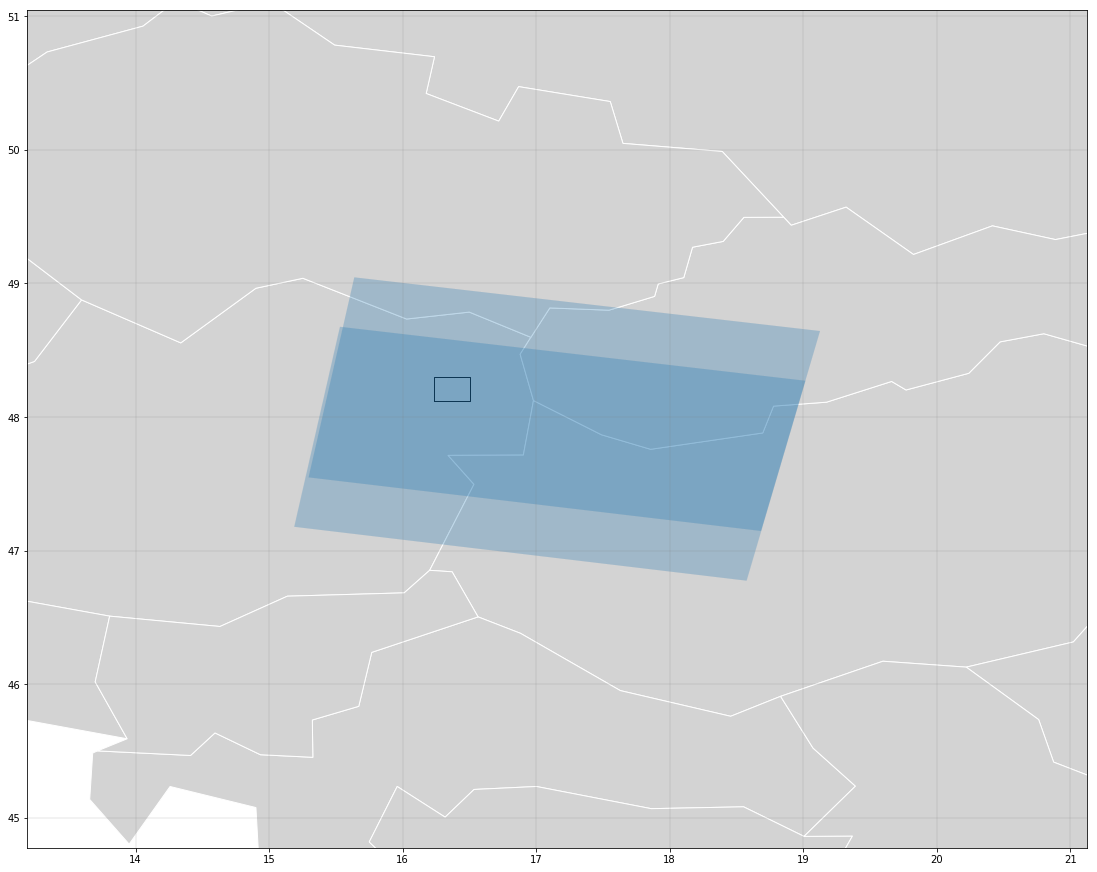

In [4]:
#---------------------------------------------------
# for plotting purposes we use this iPython magic
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (19, 19)
#---------------------------------------------------

# search command
key = 'DESCENDING_VVVH'
# we plot the full Inventory on a map
s1_grd.plot_inventory(s1_grd.refined_inventory_dict[key], transperancy=.1)

### 4* - Download of GRD scenes

As already shown in Tutorial II, you will download the scenes based on the refined inventory dataframe for the respective produckt key.

In [5]:
print(len(s1_grd.inventory))
s1_grd.download()
print(len(s1_grd.inventory))

2020-02-20 09:56:17,734 DEBUG ost.project INFO: One or more of your scenes need to be downloaded.
2020-02-20 09:56:17,734 DEBUG ost.s1_core.s1_dl Select the server from where you want to download:
2020-02-20 09:56:17,735 DEBUG ost.s1_core.s1_dl (1) Copernicus Apihub (ESA, rolling archive)
2020-02-20 09:56:17,735 DEBUG ost.s1_core.s1_dl (2) Alaska Satellite Facility (NASA, full archive)
2020-02-20 09:56:17,735 DEBUG ost.s1_core.s1_dl (3) PEPS (CNES, 1 year rolling archive)


26


Type 1, 2 or 3:  2


2020-02-20 09:56:18,638 DEBUG ost.s1_core.s1_dl Please provide username for the selected server


Username: suprd


2020-02-20 09:56:19,976 DEBUG ost.s1_core.s1_dl Please provide password for the selected server


Password: ·········


2020-02-20 09:56:36,979 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4a/download/SAR/GRD/2020/01/29/S1A_IW_GRDH_1SDV_20200129T165058_20200129T165123_031018_03901B_2431.zip
2020-02-20 09:56:40,487 DEBUG ost.helpers.asf Product S1A_IW_GRDH_1SDV_20200129T165058_20200129T165123_031018_03901B_2431.zip missing from the archive, continuing.
2020-02-20 09:56:40,618 DEBUG ost.helpers.asf Some products are missing from the archive: ['S1A_IW_GRDH_1SDV_20200129T165058_20200129T165123_031018_03901B_2431.zip']


25


### 5* - Set ARD parameters

Similar to the *Sentinel1-Scene* class (Tutorial I and III), the *Sentinel1-GRDBatch* class handles the defintion of ARD types in a hierarchical dictionary structure. You can use the same types and steps to customize as for the *Sentinel1-Scene* class.

In [6]:
# single scene ARD parameters
s1_grd.set_ard_parameters('OST')
s1_grd.ard_parameters['resolution'] = 20
# s1_grd.ard_parameters['single ARD']['product type'] = 'GTCgamma'
# s1_grd.ard_parameters['single ARD']['create ls mask'] = False

# time-series ARD
# s1_grd.ard_parameters['time-series ARD']['remove mt speckle'] = False

# in case we want to use an external dem
#s1_grd.set_external_dem('path/to/externaldem')

print(s1_grd.ard_parameters)

{'type': 'OST', 'resolution': 20, 'border_noise': True, 'product_type': 'GTCgamma', 'speckle_filter': False, 'ls_mask_create': False, 'to_db': False, 'polarisation': 'VV,VH,HH,HV', 'dem': 'SRTM 1Sec HGT', 'resampling': 'CUBIC_CONVOLUTION', 'mt_speckle_filter': True, 'to_db_mt': True, 'dtype_output': 'float32', 'apply_ls_mask': False, 'create_ls_mask': False, 'metrics': ['avg', 'max', 'min', 'std', 'cov', 'count'], 'remove_outliers': True}


### 6* - Run the batch routine

To process all the data, including time-series and timescans is as easy as one command. All the complexity is handled behind, and you just have to wait, since processing can take quite a while.

**Note** that as a last argument we submit the AOI (given as WKT) for subsetting.

In [7]:
# RAW SNAP ARD processing
s1_grd.to_ard(    
    overwrite=False, 
    subset=s1_grd.aoi
)

# Create Multitemporal outputs
s1_grd.create_timeseries()
s1_grd.create_timescan()



2020-02-20 09:56:46,678 DEBUG ost.project INFO: Starting OST ARD processing for GRD
2020-02-20 09:56:46,721 DEBUG ost.s1_core.batch Acquisition from 20200215 of track 124already processed
2020-02-20 09:56:46,733 DEBUG ost.s1_core.batch Acquisition from 20200209 of track 124already processed
2020-02-20 09:56:46,744 DEBUG ost.s1_core.batch Acquisition from 20200203 of track 124already processed
2020-02-20 09:56:46,762 DEBUG ost.s1_core.batch Acquisition from 20200128 of track 124already processed
2020-02-20 09:56:46,773 DEBUG ost.s1_core.batch Acquisition from 20200122 of track 124already processed
2020-02-20 09:56:46,787 DEBUG ost.s1_core.batch Acquisition from 20200116 of track 124already processed
2020-02-20 09:56:46,802 DEBUG ost.s1_core.batch Acquisition from 20200214 of track 22already processed
2020-02-20 09:56:46,815 DEBUG ost.s1_core.batch Acquisition from 20200208 of track 22already processed
2020-02-20 09:56:46,825 DEBUG ost.s1_core.batch Acquisition from 20200202 of track 22a

### 7* - Create a time-series animation

For interactive presentations it is nice to have animated "movies". The following command allows you to create animated time-series of oyur processed data.

In [10]:
# create the animation
s1_grd.create_timeseries_animations(
    shrink_factor=5,
    duration=1,
    add_dates=False,
)